✍ Когда мы знакомились с моделью линейной регрессии в модуле по машинному обучению, мы также кратко затронули и её модификации. Теперь настало время вновь обратиться к ним и посмотреть на них с математической точки зрения.

Начнём с **модели полиномиальной регрессии.**

>**Полином (многочлен)** от $k$ переменных $x_1, \ x_2, \ ..., \ x_k$ — это выражение (функция) вида:

$$P\left(x_{1}, x_{2}, \ldots, x_{k}\right)=\sum_{I} w_{i} x_{1}^{i_{1}} x_{2}{ }^{i_{2}} \ldots x_{k}^{i_{k}},$$

где

* $I=(i_1, i_2, \ ...., \ i_k)$ — набор из $k$ целых неотрицательных чисел — степеней полинома;
* $w_{I}$ — числа, называемые **коэффициентами полинома.**

Пока эта форма записи нам ничего не даёт — она слишком сложная. Давайте рассмотрим пример попроще. Когда переменная всего одна, полином будет записываться как:

$$P(x) = \sum_{I} w_i x^i = w_0 + w_1 x^1 + w_2 x^2 + ... + w_k x^k$$

Выражение для полинома первой степени уже можно прочитать без особого труда. Видно, что на самом деле полином — это линейная комбинация из различных степеней переменной $x$, взятой с какими-то коэффициентами, причём некоторые из коэффициентов могут быть нулевыми.

>Максимальная степень при переменной $x$ называется **степенью полинома.**

Самый простой пример полинома от одной переменной — парабола. Это полином второй степени. Вспомним её уравнение:

$$y = ax^2 + bx + c,$$

где $x$ — это некоторая неизвестная, а коэффициенты $a$, $b$ и $c$ определяют различные параметры этой параболы (направление её ветвей, начало параболы, её растяжение и т. д.).

Ниже представлены возможные варианты расположения параболы в зависимости от коэффициентов $a$, $b$ и $c$. Коэффициент $a$ определяет направление ветвей параболы ($a < 0$ — ветви направлены вниз, $a > 0$ — ветви направлены вверх), а остальные коэффициенты участвуют в расчёте дискриминанта многочлена: $D=b^2 - 4ac$. Дискриминант $D$ определяет точку пересечения параболы с осью $x$ ($D > 0$ — две точки пересечения, $D = 0$ — одна точка пересечения, $D < 0$ — пересечений с осью $x$ нет).

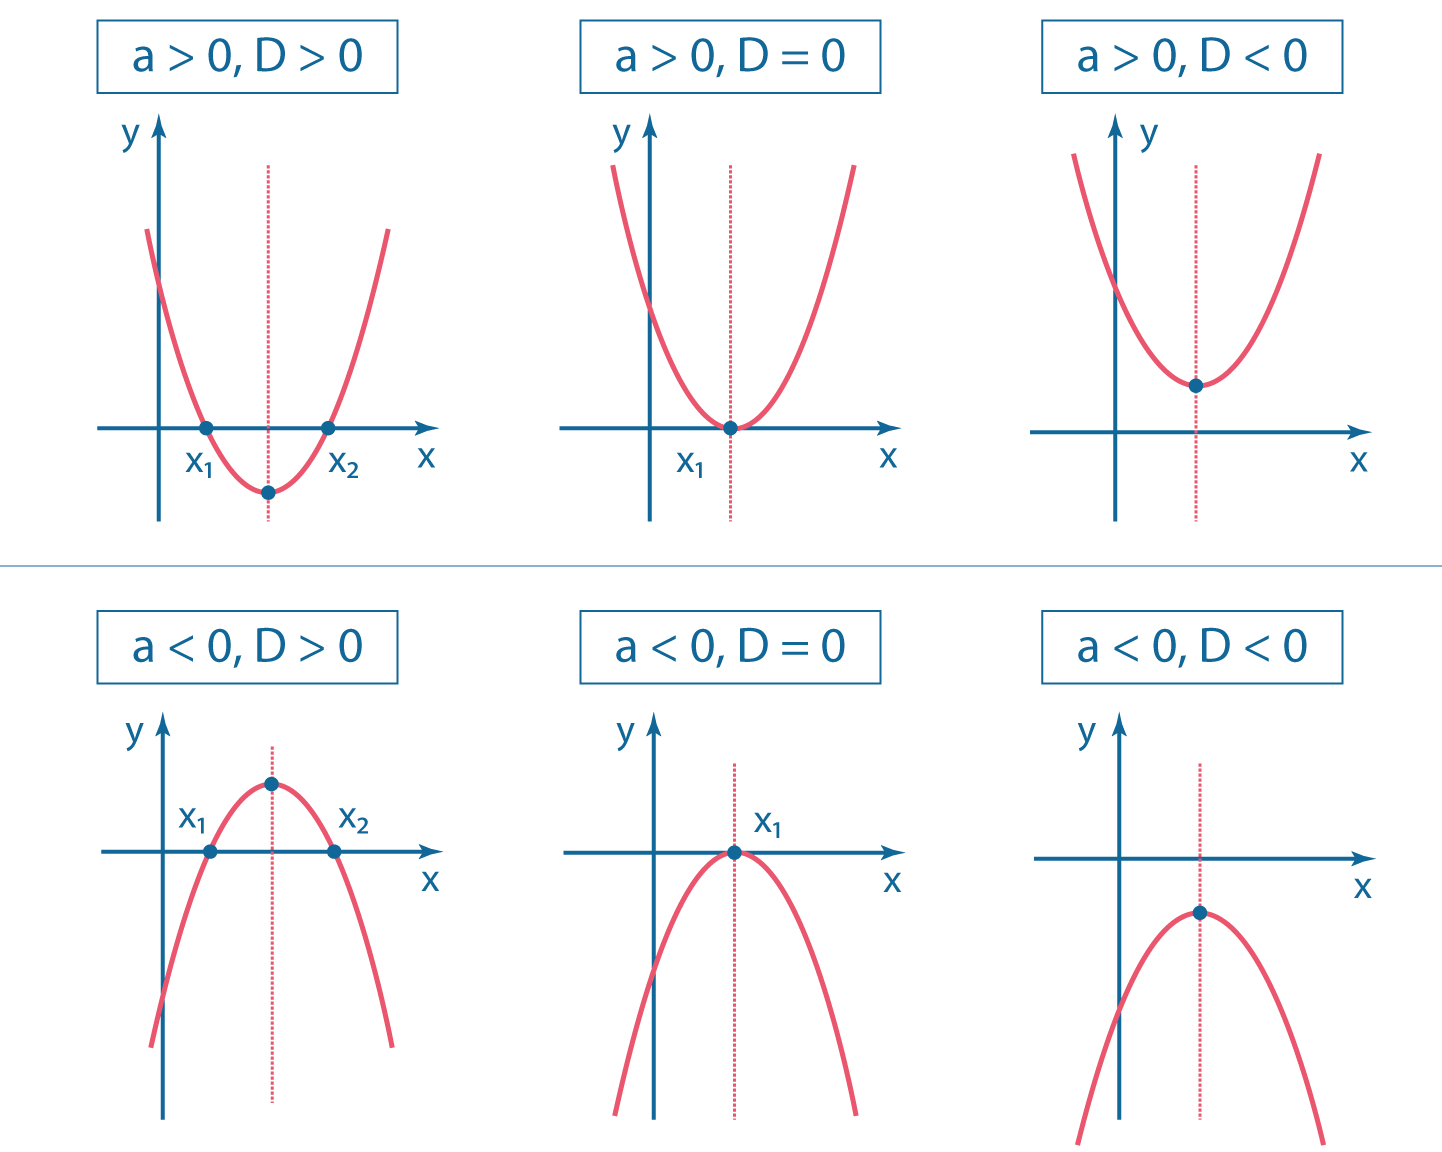

Вспомним, что уравнение $y = ax^2 + bx + c = 0$ определяет точки пересечения параболы с осью абсцисс — осью $X$. Чтобы найти точки пересечения, необходимо решить это квадратное уравнение. Вы наверняка делали это в школе: найти дискриминант, затем квадратные корни и т. д. Сейчас мы не будем этим заниматься, но понимание сути процедуры полезно для общего осознания принципа работы полиномиальной регрессии.

Несколько простых примеров различных полиномов с числовыми коэффициентами для наглядности:

$$y=8+5x+2x^2 — парабола$$

$$y=5x+x^3 — кубическая парабола$$

$$y=8x^5+3x^4+x^3+x^2+5x — полином пятой степени$$

>Кстати, отметим **важный факт**: уравнение прямой также является частным случае полинома первой степени:

$$y=w_0+w_1 x$$

**?**          
Чем нам так интересны полиномы (особенно степени > 1)?

На самом деле всё очень просто: полином степени $k$ способен описать абсолютно любую зависимость. Для этого ему достаточно задать набор наблюдений — точек, через которые он должен пройти (или пройти приблизительно). Вопрос стоит только в степени этого полинома — $k$. Например, ниже представлено три полинома: первой степени — линейная регрессия, второй степени — квадратичная регрессия и третьей степени — кубическая регрессия.

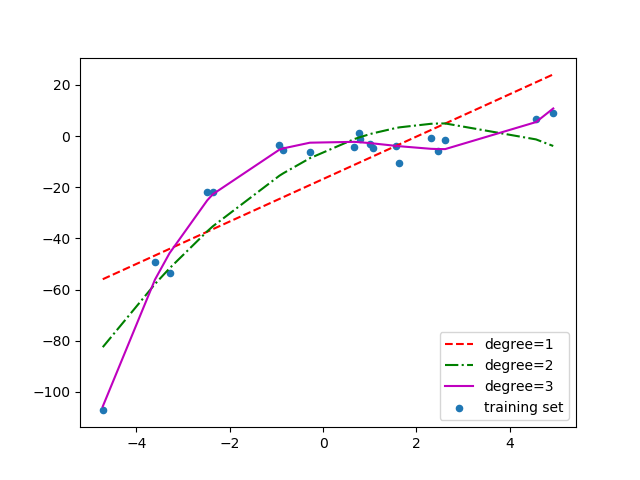

Видно, что для полинома первой степени (линейной регрессии) представленная в данных нелинейная зависимость целевой переменной $y$ от фактора $x$, даётся тяжело: ошибка прогноза довольно велика. Два других полинома хорошо описывают поведение точек в пространстве.

**Цель обучения** модели полиномиальной регрессии степени та же, что и для линейной регрессии: найти такие коэффициенты , при которых ошибка между построенной функцией и обучающей выборкой была бы наименьшей из возможных.

На самом деле для поиска этих коэффициентов мы можем использовать те же самые методы, что и для линейной регрессии, а именно **метод наименьших квадратов.** Мы можем взять уравнение полинома и потребовать, чтобы кривая проходила через точки в обучающей выборке (на графике выше они обозначены синим). Значения точек можно обозначить за $y_1, \ y_2, \ ..., \ y_N$. Тогда мы хотим, чтобы для полинома степени $k$ (от одной переменной) выполнялась система уравнений:

$$\left\{\begin{array}{c} w_0+w_1 x+w_2 x^2+\cdots+w_k x^k=y_1 \\ w_0+w_1 x+w_2 x^2+\cdots+w_k x^k=y_2 \\ w_0+w_1 x+w_2 x^2+\cdots+w_k x^k=y_N \end{array}\right.$$

Обычно количество точек в обучающей выборке $N$ значительно больше, чем степень полинома $k$, а значит перед нами переопределённая СЛАУ относительно с $k+1$ неизвестной — $w_i$. Точных решений у системы практически никогда не будет, но мы умеем решать её приближённо. Мы даже вывели формулу для приближённого решения:

$$\vec{w}=\left(A^{T} A\right)^{-1} A^{T} \vec{y}$$

→ Итак, мы вкратце обсудили, как должно выглядеть решение для полинома от одной переменной (от одного фактора). Теперь давайте более подробно остановимся на нюансах решения этой задачи и плавно перейдём к полиномам от нескольких переменных.

------

Начнём с **квадратичной регрессии от одной переменной.**

Пусть у нас некоторый вектор-фактор $\vec{x}=(x_1, x_2, ..., x_N)^T$, от которого зависит целевая переменная $\vec{y}=(y_1, y_2, ..., y_N)^T$. Будем предполагать, что зависимость нелинейная — допустим, квадратичная, то есть в качестве модели используется уравнение параболы. Тогда мы хотим выразить вектор $\vec{y}$ как линейную комбинацию из векторов $\vec{x}$ и $\vec{x}^2$:

$$\vec{y}=w_0 +w_1 \vec{x}+w_2 \vec{x}^2$$

или

$$\left(\begin{array}{c} y_1 \\ y_2 \\ \cdots \\ y_N \end{array}\right)=w_0+w_1\left(\begin{array}{c} x_1 \\ x_2 \\ \ldots \\ x_N \end{array}\right)+w_2\left(\begin{array}{c} x_1 \\ x_2 \\ \ldots \\ x_N \end{array}\right)^2$$

**Важное лирическое отступление ↓**

У внимательного студента должен был возникнуть вопрос: а что значит возвести вектор в квадрат? На первый взгляд, может показаться, что мы ищем скалярное произведение вектора с самим собой, ведь:

\vec{x}^2=\vec{x} \cdot \vec{x}=(\vec{x} \cdot \vec{x})

Однако такой вариант нам не подходит, так как скалярное произведение — это число, а нам нужен именно вектор, иначе у нас не получится составить линейную комбинацию. Поэтому здесь под $\vec{x}^2$ понимается вектор из квадратов координат вектора $\vec{x}$. Тогда:

$$\left(\begin{array}{c} x_1 \\ x_2 \\ \cdots \\ x_N \end{array}\right)^2=\left(\begin{array}{c} x_1^2 \\ x_2^2 \\ \cdots \\ x_N^2 \end{array}\right)$$

**Ещё одно важное замечание:** обратите внимание, что, несмотря на то что в нашем уравнении появились квадраты, оно всё равно продолжает быть линейным, так как неизвестным является не вектор $\vec{x}$, а коэффициенты разложения $w_0$, $w_1$ и $w_2$. 

Итак, у нас получилась СЛАУ, состоящая из $N$ уравнений на трёх неизвестных:

$$\left\{\begin{array}{c} y_1=w_0 1+w_1 x_1+w_2 x_1^2 \\ y_2=w_0 1+w_1 x_2+w_2 x_2^2 \\ \cdots \\ y_N=w_0 1+w_1 x_N+w_2 x_N^2 \end{array}\right.$$

Давайте для удобства и привычной нумерации переменных обозначим вектор $\vec{z}_1=\vec{x}$, а $\vec{z}_2=\vec{x}^2$. Тогда:

$$\vec{z}_1=\left(\begin{array}{c} z_{11} \\ z_{12} \\ \cdots \\ z_{1 N} \end{array}\right)=\left(\begin{array}{c} x_1 \\ x_2 \\ \cdots \\ x_N \end{array}\right), \mathrm{a}  \vec{z}_2=\left(\begin{array}{c} z_{21} \\ z_{22} \\ \cdots \\ z_{2 N} \end{array}\right)=\left(\begin{array}{c} x_1^2 \\ x_2^2 \\ \cdots \\ x_N^2 \end{array}\right)$$

Тогда получим уже знакомую нам неоднородную переопределённую СЛАУ:

$$\left\{\begin{array}{c} w_0 1+w_1 z_{11}+w_2 z_{21}=y_1 \\ w_0 1+w_1 z_{12}+w_2 z_{22}=y_2 \\ \ldots \\ w_0 1+w_1 z_{1 N}+w_2 z_{2 N}=y_N \end{array}\right.$$

Или в матричном виде:

$$\begin{gathered} A \vec{w}=\vec{y} \\ A=\left(\begin{array}{ccc} 1 & z_{11} & z_{21} \\ 1 & z_{12} & z_{22} \\ \ldots & \ldots & \ldots \\ 1 & z_{1 N} & z_{2 N} \end{array}\right) \\ \vec{w}=\left(w_0, w_1, w_2\right)^T \end{gathered}$$

Что мы делаем с такими СЛАУ? Верно — решаем. Правда, только приближённо. Раз система линейная и переопределённая, то МНК — наш лучший выбор. Тогда решение такой системы будет полностью аналогичным формуле для поиска коэффициентов простой линейной регрессии, разве что коэффициентов будет немного побольше:

$$\vec{w}=\left(A^{T} A\right)^{-1} A^{T} \vec{y}$$

?

**Пример № 1**

Построить квадратичную регрессию на целевую переменную $\vec{y}$ из одного фактора $\vec{y}$, если:

$$\vec{x}=\left(\begin{array}{c} 1 \\ 3 \\ -2 \\ 1 \end{array}\right) \text { и } \vec{y}=\left(\begin{array}{l} 4 \\ 5 \\ 2 \\ 2 \end{array}\right)$$

Итак, вот наша полиномиальная модель второй степени (квадратичная регрессионная модель):

$$\vec{y}=w_0 +w_1 \vec{x}+w_2 \vec{x}^2$$
$$\left(\begin{array}{l} 4 \\ 5 \\ 2 \\ 2 \end{array}\right)=w_0+w_1\left(\begin{array}{c} 1 \\ 3 \\ -2 \\ 1 \end{array}\right)+w_2\left(\begin{array}{c} 1^2 \\ 3^2 \\ (-2)^2 \\ 1^2 \end{array}\right)$$

Нам нужно найти такую линейную комбинацию из векторов $\vec{1}$, $\vec{x}$ и $\vec{x}^2$, которая в сумме давала бы наилучшее приближение для $y$. Записываем систему в матричном виде:

$$\begin{gathered} A \vec{w}=\vec{y} \\ A=\left(\begin{array}{ccc} 1 & z_{11} & z_{21} \\ 1 & z_{12} & z_{22} \\ \ldots & \ldots & \ldots \\ 1 & z_{1 N} & Z_{2 N} \end{array}\right)=\left(\begin{array}{ccc} 1 & 1 & 1^2 \\ 1 & 3 & 3^2 \\ 1 & -2 & (-2)^2 \\ 1 & 1 & 1^2 \end{array}\right)=\left(\begin{array}{ccc} 1 & 1 & 1 \\ 1 & 3 & 9 \\ 1 & -2 & 4 \\ 1 & 1 & 1 \end{array}\right) \\ \vec{w}=\left(w_0, w_1, w_2\right)^T \\ \vec{y}=(4,5,2,2)^T \end{gathered}$$

Посчитаем ранг матрицы системы и ранг расширенной матрицы системы на случай, если система определённая и имеет конкретное решение или вовсе имеет бесконечное количество решений:

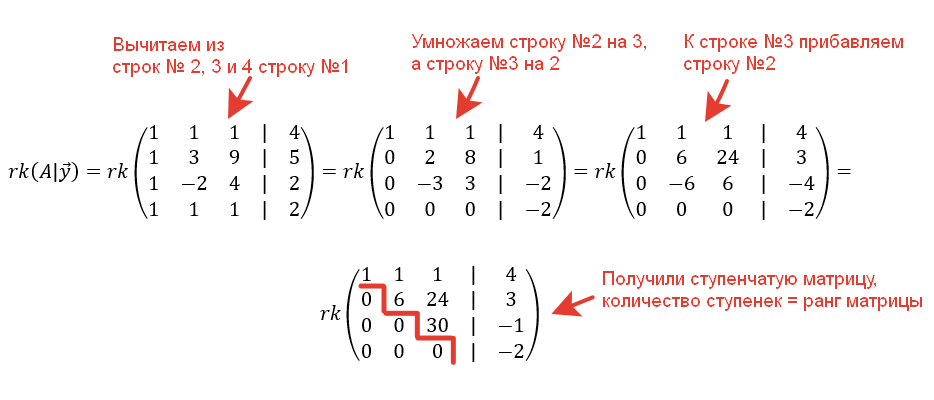
$$\begin{aligned} r k(A \mid \vec{y})=r k\left(\begin{array}{ccc|c} 1 & 1 & 1 & 4 \\ 1 & 3 & 9 & 5 \\ 1 & -2 & 4 & 2 \\ 1 & 1 & 1 & 2 \end{array}\right) & =r k\left(\begin{array}{ccc|c} 1 & 1 & 1 & 4 \\ 0 & 2 & 8 & 1 \\ 0 & -3 & 3 & -2 \\ 0 & 0 & 0 & -2 \end{array}\right)=r k\left(\begin{array}{ccc|c} 1 & 1 & 1 & 4 \\ 0 & 6 & 24 & 3 \\ 0 & -6 & 6 & -4 \\ 0 & 0 & 0 & -2 \end{array}\right)= \\ & =r k\left(\begin{array}{ccc|c} 1 & 1 & 1 & 4 \\ 0 & 6 & 24 & 3 \\ 0 & 0 & 30 & -1 \\ 0 & 0 & 0 & -2 \end{array}\right) \end{aligned}$$

Видно, что ранг матрицы системы ($rk(A)=3$) всё-таки меньше, чем ранг расширенной матрицы ($rk(A|\vec{y})=4), а значит система не имеет конкретных решений — только приближённые. Найдём их:

$$\vec{w}=\left(A^{T} A\right)^{-1} A^{T} \vec{y}$$

Для оптимизации процесса считать будем на Python:

In [1]:
import numpy as np
A = np.array([
    [1, 1, 1, 1],
    [1, 3, -2, 1],
    [1, 9, 4, 1]
]).T
y = np.array([4, 5, 2, 2])
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat) 
# [2.4        0.46666667 0.13333333]

[2.4        0.46666667 0.13333333]


Таким образом, наш вектор оценок коэффициентов:

$$\hat{\vec{w}} = (\hat{w}_0, \hat{w}_1, \hat{w}_2)^T = (2.4, 0.47, 0.13)^T$$

Чтобы сделать прогноз для нового наблюдения $x_{new}$, нам нужно поставить его в уравнение полинома с найденными коэффициентами:

$$\vec{y}=2.4 +0.47 x_{new} + 0.13 x^{2}_{new}$$

Как вы понимаете, один фактор — это слишком тривиальная, далёкая от реальности ситуация. Давайте посмотрим, как выглядит уравнение квадратичной регрессии **для случая двух переменных**.

Пусть у нас есть два фактора $\vec{x}_1$ и $\vec{x}_2$, от которых зависит целевая переменная $\vec{y}$:

$$\vec{x}_1=\left(\begin{array}{c} x_{11} \\ x_{12} \\ \cdots \\ x_{1 N} \end{array}\right), \quad \vec{x}_2=\left(\begin{array}{c} x_{21} \\ x_{22} \\ \ldots \\ x_{2 N} \end{array}\right), \quad \vec{y}=\left(\begin{array}{c} y_1 \\ y_2 \\ \ldots \\ y_N \end{array}\right)$$

Всё то же самое: будем предполагать, что зависимость нелинейная, а точнее, квадратичная, то есть в качестве модели используется полином второй степени, задающий сложную трёхмерную поверхность, форма которой напрямую зависит от коэффициентов. Заметим, что в функцию уже будут включены попарные произведения факторов $\vec{x}_1$ и $\vec{x}_2$, а коэффициентов будет уже шесть:

$$\vec{y}=w_{0}+w_{1} \vec{x}_{1}+w_{2} \vec{x}_{2}+w_{3} \vec{x}_{1}^{2}+w_{4} \vec{x}_{1} \vec{x}_{2}+w_{5} \vec{x}_{2}^{2}$$

Примечание. Здесь, как и в предыдущем случае, запись $\vec{x}_1 \vec{x}_2$ означает покоординатное (не скалярное!) произведение векторов $\vec{x}_1$ и $\vec{x}_2$.

или

$$\left(\begin{array}{c}y_1 \\ y_2 \\ \cdots \\ y_N\end{array}\right)=w_0+w_1\left(\begin{array}{c}x_{11} \\ x_{12} \\ \cdots \\ x_{1 N}\end{array}\right)+w_2\left(\begin{array}{c}x_{21} \\ x_{22} \\ \cdots \\ x_{2 N}\end{array}\right)+w_3\left(\begin{array}{c}x_{11}^2 \\ x_{12}^2 \\ \ldots \\ x_{1 N}^2\end{array}\right)+w_4\left(\begin{array}{c}x_{11} \cdot x_{21} \\ x_{12} \cdot x_{22} \\ \cdots \\ x_{1 N} \cdot x_{2 N}\end{array}\right)+w_5\left(\begin{array}{c}x_{21}^2 \\ x_{22}^2 \\ \cdots \\ x_{2 N}^2\end{array}\right)$$

В матричном виде:

$$\begin{gathered}A \vec{w}=\vec{y} \\ A=\left(\begin{array}{cccccc}1 & x_{11} & x_{21} & x_{11}^2 & x_{11} \cdot x_{21} & x_{21}^2 \\ 1 & x_{12} & x_{22} & x_{12}^2 & x_{12} \cdot x_{22} & x_{22}^2 \\ \ldots & \ldots & \ldots & \ldots & \ldots & \ldots \\ 1 & x_{1 N} & x_{2 N} & x_{1 N}^2 & x_{1 N} \cdot x_{2 N} & x_{2 N}^2\end{array}\right) \\ \vec{w}=\left(w_0, w_1, w_2, w_3, w_4, w_5\right)^T \\ \vec{y}=\left(y_1, y_2, \ldots, y_N\right)^T\end{gathered}$$

Выглядит громоздко, но на деле ничего серьёзного. Если воспринимать все полиномиальные столбцы как обычные столбцы, состоящие из чисел, мы просто снова получим обычную переопределённую неоднородную СЛАУ (если $N$ значительно больше количества признаков $k$):

$$A=\left(\begin{array}{cccccc} 1 & Z_{11} & Z_{21} & z_{31} & z_{41} & Z_{51} \\ 1 & z_{12} & z_{22} & z_{32} & z_{42} & Z_{52} \\ \cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\ 1 & z_{1 N} & Z_{2 N} & Z_{3 N} & Z_{2 N} & Z_{5 N} \end{array}\right)$$

→ Сразу обратим внимание на то, что для того, чтобы система имела точное (была совместной) или хотя бы приближённое решение, нам необходимо, чтобы строк в матрице было как минимум шесть, причём все уравнения должны быть линейно независимыми. Иначе количество строк будет меньше количества столбцов, и тогда решений будет бесконечное множество (по первому следствию теоремы Кронекера — Капелли), а такой случай нам не подходит.

**Что это значит на языке геометрии?**

Это значит, что нам нужно как минимум шесть точек в трёхмерном пространстве с осями $\vec{x}_1$, $\vec{x}_2$ и $\vec{x}_1$, чтобы мы смогли провести через них нашу поверхность, которую задаёт уравнение:

$$\vec{y}=w_{0}+w_{1} x_{1}+w_{2} x_{2}+w_{3} x_{1}^{2}+w_{4} x_{1} x_{2}+w_{5} x_{2}^{2}$$

?

**Пример № 2**

Построить квадратичную регрессию на целевую переменную $\vec{y}$ из двух факторов $\vec{x}_1$ и $\vec{x}_2$, если:

$$\vec{x}_1=\left(\begin{array}{c} 1 \\ 3 \\ -2 \\ 1 \\ 5 \\ 13 \\ 1 \end{array}\right), \quad \vec{x}_2=\left(\begin{array}{c} 3 \\ 4 \\ 5 \\ -2 \\ 4 \\ 11 \\ 3 \end{array}\right) \text { и } \quad \vec{y}=\left(\begin{array}{c} 4 \\ 5 \\ 2 \\ 2 \\ 6 \\ 8 \\ -1 \end{array}\right)$$
Записываем нашу модель:

$$\begin{gathered} \vec{y}=w_0+w_1 \vec{x}_1+w_2 \vec{x}_2+w_3 \vec{x}_1^2+w_4 \vec{x}_1 \vec{x}_2+w_5 \vec{x}_2^2 \\ \left(\begin{array}{l} 4 \\ 5 \\ 2 \\ 2 \\ 6 \\ 8 \\ 1 \end{array}\right)=w_0+w_1\left(\begin{array}{c} 1 \\ 3 \\ -2 \\ 1 \\ 5 \\ 13 \\ 1 \end{array}\right)+w_2\left(\begin{array}{c} 3 \\ 4 \\ 5 \\ -2 \\ 4 \\ 11 \\ 3 \end{array}\right)+w_3\left(\begin{array}{c} 1^2 \\ 3^2 \\ (-2)^2 \\ 1^2 \\ 5^2 \\ 13^2 \\ 1 \end{array}\right)+w_4\left(\begin{array}{c} 1 \cdot 3 \\ 3 \cdot 4 \\ (-2) \cdot 5 \\ 1 \cdot (-2) \\ 5 \cdot 4 \\ 13 \cdot 11 \\ 1 \cdot 3 \end{array}\right)+w_5\left(\begin{array}{c} 3^2 \\ 4^2 \\ 5^2 \\ (-2)^2 \\ 4^2 \\ 11^2 \\ 3^2 \end{array}\right) \end{gathered}$$

Записываем систему в матричном виде:

$$\begin{aligned} & A \vec{w}=\vec{y} \\ & A=\left(\begin{array}{cccccc} 1 & z_{11} & z_{21} & z_{31} & z_{41} & z_{51} \\ 1 & z_{12} & z_{22} & z_{32} & z_{42} & z_{52} \\ 1 & z_{13} & z_{23} & z_{33} & z_{43} & z_{53} \\ 1 & z_{14} & z_{24} & z_{34} & z_{44} & z_{54} \\ 1 & z_{15} & z_{25} & z_{35} & z_{45} & z_{55} \\ 1 & z_{16} & z_{26} & z_{36} & z_{46} & z_{56} \\ 1 & z_{17} & z_{27} & z_{37} & z_{47} & z_{57} \end{array}\right)=\left(\begin{array}{cccccc} 1 & 1 & 3 & 1^2 & 1 \cdot 3 & 3^2 \\ 1 & 3 & 4 & 3^2 & 3 \cdot 4 & 4^2 \\ 1 & -2 & 5 & (-2)^2 & (-2) \cdot 5 & 5^2 \\ 1 & 1 & -2 & 1^2 & 1 \cdot(-2) & (-2)^2 \\ 1 & 5 & 4 & 5^2 & 5 \cdot 4 & 4^2 \\ 1 & 13 & 11 & 13^2 & 13 \cdot 11 & 11^2 \\ 1 & 1 & 3 & 1 & 1 \cdot 3 & 3^2 \end{array}\right)= \\ & =\left(\begin{array}{cccccc} 1 & 1 & 3 & 1 & 3 & 9 \\ 1 & 3 & 4 & 9 & 12 & 16 \\ 1 & -2 & 5 & 4 & -10 & 25 \\ 1 & 1 & -2 & 1 & -2 & 4 \\ 1 & 5 & 4 & 25 & 20 & 16 \\ 1 & 13 & 11 & 169 & 143 & 121 \\ 1 & 1 & 3 & 1 & 3 & 9 \end{array}\right) \\ & \vec{w}=\left(w_0, w_1, w_2, w_3, w_4, w_5\right)^T \\ & \vec{y}=(4,5,2,2,6,8,-1)^T \\ & \end{aligned}$$

Видно, что первое и последнее уравнение системы противоречат друг другу. Можно не считать ранг —сразу понятно, что система будет переопределённой и нужно искать приблизительные решения по МНК:

$$\vec{w}=\left(A^{T} A\right)^{-1} A^{T} \vec{y}$$

Чтобы решить такую задачу, без Python и матричных вычислений точно не обойтись. Переведём наши условия в программную реализацию. С точки зрения программы самое сложное в этой задаче — правильно записать матрицу $A$:

In [2]:
A = np.array([
    [1, 1, 1, 1, 1, 1, 1],
    [1, 3, -2, 1, 5, 13, 1],
    [3, 4, 5, -2, 4, 11, 3],
    [1, 9, 4, 1, 25, 169, 1],
    [3, 12, -10, -2, 20, 143, 3],
    [9, 16, 25, 4, 16, 121, 9]
    
]).T
y = np.array([4, 5, 2, 2, 6, 8, -1])
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat)
## [-2.25799015  2.37672337 -0.1322068  -0.10208147 -0.26501791  0.29722471]

[-2.25799015  2.37672337 -0.1322068  -0.10208147 -0.26501791  0.29722471]


Итак, наш вектор приближений коэффициентов найден:

$$\hat{\vec{w}}=(-2.26, 2.38, -0.13, -0.1, -0.27, 0.3)^T$$

`Как вы понимаете, вручную считать коэффициенты полиномиальной регрессии — неблагодарное дело. А ведь мы с вами рассмотрели только случай полинома второй степени с двумя факторами. Расти может как степень полинома, так и количество факторов. Можно представить, какую размерность может приобрести система уравнений.`

`Например, уравнение модели полинома третьей степени для случая двух факторов будет иметь следующий вид:`

$$\vec{y}=w_{0}+w_{1} \vec{x}_{1}+w_{2} \vec{x}_{2}+w_{3} \vec{x}_{1}^{2}+w_{4} \vec{x}_{1} \vec{x}_{2}+w_{5} \vec{x}_{2}^{2}+w_{6} \vec{x}_{1}^{3}+w_{7} \vec{x}_{1}^{2} \vec{x}_{2}+w_{8} \vec{x}_{2}^{3}+w_{9} \vec{x}_{1} \vec{x}_{2}^{2}$$

`Количество неизвестных уже равно 10, а факторов пока ещё два. Как говорится, то ли ещё будет...`

>**Примечание.** Кстати, для того чтобы определить количество коэффициентов в регрессии, есть формула:

$$c = \frac{n!}{(n-d)!d!},$$
$$n = k + d,$$

где $k$ — количество факторов, $d$ — степень полинома, а $!$ — символ факториала. Например, для двух факторов и пятой степени полинома будем иметь:

$$n=2+5=7$$
$$c = \frac{n!}{(n-d)!d!} = \frac{7!}{(7-5)!5!} = \frac{7!}{2!5!} = \frac{1 \cdot 2 \cdot 3 \cdot 4 \cdot 5 \cdot 6 \cdot 7}{(1 \cdot 2) \cdot (1 \cdot 2 \cdot 3 \cdot 4 \cdot 5)} = \frac{42}{2} = 21$$

То есть в матрице измерений $A$ будет 21 столбец.

Конечно, вручную создавать полиномиальные столбцы в матрице наблюдений мы не будем. В модуле «ML-2. Обучение с учителем: регрессия» мы с вами уже знакомились с полиномиальными признаками, генерация которых реализована в классе **[PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)** из модуля preprocessing. 

Потренируемся на следующем **примере ↓**

?

**Пример № 3**

Строится полиномиальная регрессия второй степени, задано три фактора:

$$\vec{x}_{1}=\left(\begin{array}{c} 1 \\ 3 \\ -2 \\ 1 \\ 5 \\ 13 \\ 1 \end{array}\right) \vec{x}_{2}=\left(\begin{array}{c} 3 \\ 4 \\ 5 \\ -2 \\ 4 \\ 11 \\ 3 \end{array}\right) \text { и } \vec{x}_{3}=\left(\begin{array}{c} 4 \\ 5 \\ 2 \\ 2 \\ 6 \\ 8 \\ -1 \end{array}\right)$$

Создайте матрицу наблюдений $A_{poly}$ со сгенерированными полиномиальными признаками.

Для начала составим обычную матрицу наблюдений $A$, расположив векторы в столбцах. Обратите внимание, что вектор из 1 мы не будем добавлять в матрицу (за нас это сделает генератор полиномиальных признаков):

In [3]:
A = np.array([
    [1, 3, -2, 1, 5, 13, 1],
    [3, 4, 5, -2, 4, 11, 3],
    [4, 5, 2, 2, 6, 8, -1],
]).T
print(A)

[[ 1  3  4]
 [ 3  4  5]
 [-2  5  2]
 [ 1 -2  2]
 [ 5  4  6]
 [13 11  8]
 [ 1  3 -1]]


Затем импортируем класс PolynomialFeatures из библиотеки sklearn. Создадим объект этого класса, указав при инициализации степень полинома равной 2. Также укажем, что нам нужна генерация столбца из 1 (параметр include_bias=True):

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)

Осталось только вызвать метод fit_transform() от имени этого объекта и передать в него нашу матрицу наблюдений $A$. Для удобства выведем результат в виде DataFrame:

In [5]:
import pandas as pd
A_poly = poly.fit_transform(A)
display(pd.DataFrame(A_poly))

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,9.0,12.0,16.0
1,1.0,3.0,4.0,5.0,9.0,12.0,15.0,16.0,20.0,25.0
2,1.0,-2.0,5.0,2.0,4.0,-10.0,-4.0,25.0,10.0,4.0
3,1.0,1.0,-2.0,2.0,1.0,-2.0,2.0,4.0,-4.0,4.0
4,1.0,5.0,4.0,6.0,25.0,20.0,30.0,16.0,24.0,36.0
5,1.0,13.0,11.0,8.0,169.0,143.0,104.0,121.0,88.0,64.0
6,1.0,1.0,3.0,-1.0,1.0,3.0,-1.0,9.0,-3.0,1.0


Итак, мы получили нашу матрицу $A_{poly}$. Давайте посмотрим на её столбцы:

* столбец 0 — единичный, он отвечает за слагаемое с нулевой степенью полинома (любое число в степени 0 даёт единицу).
* столбцы 1, 2 и 3 — это наши исходные признаки (векторы $\vec{x}_1$, $\vec{x}_2$ и $\vec{x}_3$).
* столбцы 4, 5 и 6 — произведения первого столбца со всеми столбцами: $\vec{x}_1 \vec{x}_1=\vec{x}_{1}^{2}$, $\vec{x}_1 \vec{x}_2$ и $\vec{x}_1 \vec{x}_3$ соответственно.
* столбцы 7 и 8 — произведения второго столбца со столбцами 2 и 3: $\vec{x}_2 \vec{x}_2=\vec{x}_{2}^{2}$  и $\vec{x}_2 \vec{x}_3$.
* столбец 9 — произведение третьего столбца с самим собой: $\vec{x}_3 \vec{x}_3=\vec{x}_{3}^{2}$.

Таким образом, при генерации полиномиальных признаков объект PolynomialFeatures сначала создаёт исходные факторы, затем умножает каждый из них на все факторы и повторяет процедуру. При этом, если комбинация $\vec{x}_i \vec{x}_j$ уже была сгенерирована ранее, то комбинация $\vec{x}_j \vec{x}_i$ не рассматривается.

А теперь построим модель полиномиальной регрессии **на реальных данных**.

Возьмём все те же данные о стоимости жилья в районах Бостона. Будем использовать следующие четыре признака: LSTAT, CRIM, PTRATIO и RM. С их помощью мы построим полиномиальную регрессию от первой до пятой степени включительно, а затем сравним результаты по значению средней абсолютной процентной ошибки (MAPE).

Чтобы не дублировать код, объявим функцию polynomial_regression(). Она будет принимать на вход матрицу наблюдений, вектор ответов и степень полинома, а возвращать матрицу с полиномиальными признаками, вектор предсказаний и коэффициенты регрессии, найденные по МНК:

In [6]:
def polynomial_regression(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=True)
    X_poly = poly.fit_transform(X)
    w_hat = np.linalg.inv(X_poly.T@X_poly)@X_poly.T@y
    y_pred = X_poly @ w_hat
    return X_poly, y_pred, w_hat

Выделяем интересующие нас признаки и строим полиномы:

In [7]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)

boston_data[['CHAS', 'LSTAT', 'CRIM','RM']].describe()

A = boston_data[['LSTAT', 'PTRATIO', 'RM', 'CRIM']]
y = boston_data[['PRICE']]
 
A_poly, y_pred, w_hat = polynomial_regression(A, y, 1)
A_poly2, y_pred2, w_hat2 = polynomial_regression(A, y, 2)
A_poly3, y_pred3, w_hat3 = polynomial_regression(A, y, 3)
A_poly4, y_pred4, w_hat4 = polynomial_regression(A, y, 4)
A_poly5, y_pred5, w_hat5 = polynomial_regression(A, y, 5)

Посмотрим на качество построенных регрессий, вычислив метрику:

In [8]:
from sklearn.metrics import mean_absolute_percentage_error
 
print('MAPE для полинома 1-й степени {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred)*100))
print('MAPE для полинома 2-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred2)*100))
print('MAPE для полинома 3-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred3)*100))
print('MAPE для полинома 4-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred4)*100))
print('MAPE для полинома 5-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred5)*100))
## MAPE для полинома 1-й степени 18.20%
## MAPE для полинома 2-й степени 13.41%
## MAPE для полинома 3-й степени 12.93%
## MAPE для полинома 4-й степени 10.74%
## MAPE для полинома 5-й степени 70.18%

MAPE для полинома 1-й степени 18.20%
MAPE для полинома 2-й степени  13.41%
MAPE для полинома 3-й степени  12.93%
MAPE для полинома 4-й степени  10.76%
MAPE для полинома 5-й степени  240.49%


Что видим? Полиномиальная регрессия первой степени (линейная регрессия) показывает наименьшее качество предсказания, так как зависимость между факторами и целевым признаком нелинейная. С повышением степени полинома процентная ошибка на обучающей выборке вроде бы падает, однако для полинома пятой степени она резко возрастает. Это означает, что модель вообще не описывает зависимость в исходных данных — её прогноз не имеет никакого отношения к действительности.

**Почему так происходит?**

Проведём небольшое исследование. Для начала посмотрим на коэффициенты регрессии для полинома пятой степени. Смотреть на каждый из них неудобно, их слишком много (126, если быть точными), но можно взглянуть на минимум, максимум и среднее:

In [9]:
display(pd.DataFrame(w_hat5).describe())

,PRICE
count,126.000000
mean,1213.794262
std,31735.076511
min,-154232.445804
25%,-0.749542
50%,-0.000313
75%,0.967775
max,316479.185962


Видно, что в степенях минимального и максимального коэффициентов явно что-то не так — коэффициенты слишком огромные (исчисляются миллионами).

Теперь давайте взглянем на корреляционную матрицу для факторов, на которых мы строим полином пятой степени. Корреляцию со столбцом из единиц считать бессмысленно, поэтому мы не будем его рассматривать. Для удобства расчёта матрицы корреляций обернём матрицу  в DataFrame и воспользуемся методом corr():

In [10]:
# считаем матрицу корреляций (без столбца из единиц)
C = pd.DataFrame(A_poly5[:, 1:]).corr()
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))
# считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', A_poly5[:, 1:].shape[1])
# Ранг корреляционной матрицы: 110
# Количество факторов: 125


Ранг корреляционной матрицы: 110
Количество факторов: 125


Мы нашли корень проблемы: ранг корреляционной матрицы — 110, в то время как общее количество факторов (не считая единичного столбца) — 125, то есть ранг корреляционной матрицы не максимален. Это значит, что в корреляционной матрице присутствуют единичные корреляции, а в исходной матрице — линейно зависимые столбцы.

Как так вышло? На самом деле всё очень просто: в процессе перемножения каких-то из столбцов при создании полинома пятой степени получился такой полиномиальный фактор, который линейно выражается через другие факторы.

В результате при вычислении обратной матрицы  у нас получилось деление на число, близкое к 0, а элементы обратной матрицы получились просто огромными. Отсюда и появились явно неверные степени коэффициентов, которые дают далёкий от действительности прогноз, что приводит к отрицательной метрике.

Кстати, заметим, что, например, для полинома четвёртой степени ранг матрицы корреляций максимален, то есть равен количеству факторов (не включая единичный столбец):

In [11]:
# считаем матрицу корреляций (без столбца из единиц)
C = pd.DataFrame(A_poly4[:, 1:]).corr()
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))
# считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', A_poly4[:, 1:].shape[1])
## Ранг корреляционной матрицы: 69
## Количество факторов: 69

Ранг корреляционной матрицы: 69
Количество факторов: 69


Поэтому и коэффициенты регрессии полинома четвёртой степени находятся в адекватных пределах.

In [12]:
display(pd.DataFrame(w_hat4).describe())

,PRICE
count,70.000000
mean,-50.870351
std,887.140000
min,-6923.593601
25%,-0.187941
50%,-0.000789
75%,0.322214
max,2305.178092


А теперь посмотрим, что будет, если использовать для построения полиномиальной регрессии **реализацию из библиотеки sklearn.** Создадим функцию polynomial_regression_sk — она будет делать то же самое, что и прошлая функция, но средствами sklearn. Дополнительно будем смотреть также стандартное отклонение (разброс) по коэффициентам регрессии.

In [13]:
from sklearn.linear_model import LinearRegression
def polynomial_regression_sk(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=False)
    X_poly = poly.fit_transform(X)
    lr = LinearRegression().fit(X_poly, y)
    y_pred = lr.predict(X_poly)
    return X_poly, y_pred, lr.coef_

A = boston_data[['LSTAT', 'PTRATIO', 'RM', 'CRIM']]
y = boston_data[['PRICE']]

for k in range(1, 6):
    A_poly, y_pred, w_hat = polynomial_regression_sk(A, y, k)
    print(
        "MAPE для полинома степени {} — {:.2f}%, СКО — {:.0f}".format(
            k, mean_absolute_percentage_error(y, y_pred)*100, w_hat.std()
        )

    )
## MAPE для полинома степени 1 — 18.20%, СКО — 2
## MAPE для полинома степени 2 — 13.41%, СКО — 5
## MAPE для полинома степени 3 — 12.93%, СКО — 9
## MAPE для полинома степени 4 — 10.74%, СКО — 304
## MAPE для полинома степени 5 — 9.02%, СКО — 17055

MAPE для полинома степени 1 — 18.20%, СКО — 2
MAPE для полинома степени 2 — 13.41%, СКО — 5
MAPE для полинома степени 3 — 12.93%, СКО — 9
MAPE для полинома степени 4 — 10.74%, СКО — 304
MAPE для полинома степени 5 — 9.03%, СКО — 17055


Очередная «магия» sklearn — построение полинома пятой степени прошло успешно.

**?**

Почему так получилось, если, строя полином «руками», мы получали противоположный результат?

На самом деле с этим «заклинанием» из библиотеки sklearn мы уже знакомились в предыдущих юнитах. Секрет в том, что в sklearn для построения линейной регрессии используется не сама матрица наблюдений $A$, а её сингулярное разложение, которое гарантированно является невырожденным — из него исключаются линейно зависимые факторы. Таким образом, даже несмотря на немаксимальный ранг корреляционной матрицы, построить полином пятой степени всегда получится.

Однако коэффициенты полинома пятой степени обладают значительно бόльшим разбросом, чем другие модели. Разброс будет всё больше расти при увеличении степени полинома. Коэффициенты не будут отражать реальной зависимости в данных и будут построены так, чтобы компенсировать линейную зависимость факторов, то есть будут неустойчивыми.

К тому же, как мы уже знаем, чем выше степень полинома, тем выше шанс переобучения: модель может быть настолько сложной, что попросту попытается пройти через все точки в обучающем наборе данных, не уловив общей закономерности. Пример такой переобученной модели представлен ниже:

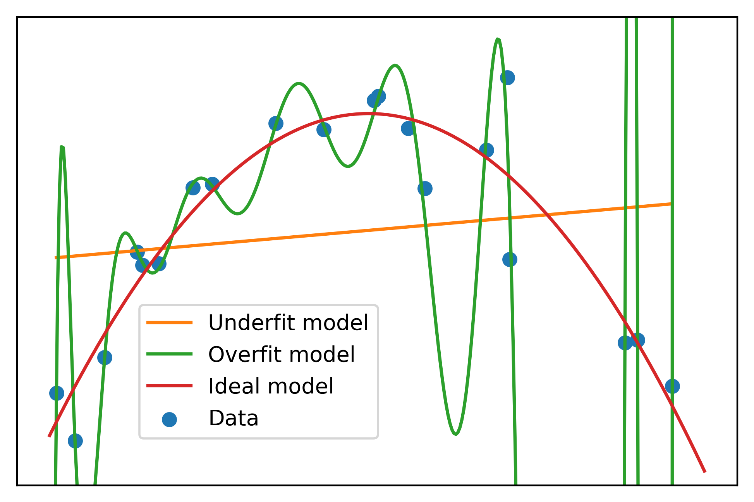

**Резюмируем ↓**

* Модель полиномиальной регрессии — более общий случай линейной регрессии, в котором зависимость целевой переменной от факторов нелинейная.
* Поиск коэффициентов полинома аналогичен линейной регрессии — решение неоднородной СЛАУ. 
* Возможна ситуация, когда какие-то сгенерированные полиномиальные факторы могут линейно выражаться через другие факторы. Тогда ранг корреляционной матрицы будет меньше числа факторов и поиск по классическому МНК-алгоритму не будет успешным.
* В sklearn для решения последней проблемы предусмотрена защита — использование сингулярного разложения матрицы . Однако данная защита не решает проблемы неустойчивости коэффициентов регрессии.
* Полиномиальная регрессия имеет сильную склонность к переобучению: чем выше степень полинома, тем сложнее модель и выше риск переобучения.

**Задание 6.4**

С помощью классического МНК найдите коэффициенты полиномиальной регрессии, если используется полином второй степени и задан фактор $\vec{x}$ и целевая переменная $\vec{y}$.

$$\vec{y} = w_0 + w_1 \vec{x} + w_2 \vec{x}^2$$
$$\vec{x}=\left(\begin{array}{c}
1 \\
3 \\
-2 \\
9
\end{array}\right) \vec{y}=\left(\begin{array}{c}
3 \\
7 \\
-5 \\
21
\end{array}\right)$$

В качестве ответа приведите координаты вектора коэффициентов $\hat{w}_0$, $\hat{w}_1$, $\hat{w}_2$, округлив их до первого знака после точки-разделителя.

In [15]:
A = np.array([
    [1, 1, 1, 1, 1, 1, 1],
    [1, 3, -2, 1, 5, 13, 1],
    [3, 4, 5, -2, 4, 11, 3],
    [1, 9, 4, 1, 25, 169, 1],
    [3, 12, -10, -2, 20, 143, 3],
    [9, 16, 25, 4, 16, 121, 9]
    
]).T
y = np.array([4, 5, 2, 2, 6, 8, -1])

w = np.linalg.inv(A.T@A)@A.T@y
display(w.reshape(6,1))

array([[-2.25799015],
       [ 2.37672337],
       [-0.1322068 ],
       [-0.10208147],
       [-0.26501791],
       [ 0.29722471]])

In [16]:
A = np.array([
    [1, 3, -2, 1, 5, 13, 1],
    [3, 4, 5, -2, 4, 11, 3],
    [4, 5, 2, 2, 6, 8, -1],
]).T
print(A)

[[ 1  3  4]
 [ 3  4  5]
 [-2  5  2]
 [ 1 -2  2]
 [ 5  4  6]
 [13 11  8]
 [ 1  3 -1]]


In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True)

A_poly = poly.fit_transform(A)
display(pd.DataFrame(A_poly))

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,9.0,12.0,16.0
1,1.0,3.0,4.0,5.0,9.0,12.0,15.0,16.0,20.0,25.0
2,1.0,-2.0,5.0,2.0,4.0,-10.0,-4.0,25.0,10.0,4.0
3,1.0,1.0,-2.0,2.0,1.0,-2.0,2.0,4.0,-4.0,4.0
4,1.0,5.0,4.0,6.0,25.0,20.0,30.0,16.0,24.0,36.0
5,1.0,13.0,11.0,8.0,169.0,143.0,104.0,121.0,88.0,64.0
6,1.0,1.0,3.0,-1.0,1.0,3.0,-1.0,9.0,-3.0,1.0


In [35]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)

boston_data[['CHAS', 'LSTAT', 'CRIM','RM']].describe()

A = boston_data[['LSTAT', 'PTRATIO', 'RM', 'CRIM']]
y = boston_data[['PRICE']]

def polynomial_regression(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=True)
    X_poly = poly.fit_transform(X)
    w_hat = np.linalg.inv(X_poly.T@X_poly)@X_poly.T@y
    y_pred = X_poly @ w_hat
    return X_poly, y_pred, w_hat
 
A_poly1, y_pred1, w_hat1 = polynomial_regression(A, y, 1)
A_poly2, y_pred2, w_hat2 = polynomial_regression(A, y, 2)
A_poly3, y_pred3, w_hat3 = polynomial_regression(A, y, 3)
A_poly4, y_pred4, w_hat4 = polynomial_regression(A, y, 4)
A_poly5, y_pred5, w_hat5 = polynomial_regression(A, y, 5)

In [40]:
from sklearn.metrics import mean_absolute_percentage_error

for i in range(5):
    n = [y_pred1,y_pred2,y_pred3,y_pred4,y_pred5]
    display(f'MAPE для полинома {i+1}-й степени {round(mean_absolute_percentage_error(y,n[i])*100,2)}%')

'MAPE для полинома 1-й степени 18.2%'

'MAPE для полинома 2-й степени 13.41%'

'MAPE для полинома 3-й степени 12.93%'

'MAPE для полинома 4-й степени 10.76%'

'MAPE для полинома 5-й степени 240.49%'

In [37]:
display(pd.DataFrame(w_hat5).describe())

,PRICE
count,126.000000
mean,1213.794262
std,31735.076511
min,-154232.445804
25%,-0.749542
50%,-0.000313
75%,0.967775
max,316479.185962


In [38]:
def polynomial_regression_sk(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=False)
    X_poly = poly.fit_transform(X)
    lr = LinearRegression().fit(X_poly, y)
    y_pred = lr.predict(X_poly)
    return X_poly, y_pred, lr.coef_

A = boston_data[['LSTAT', 'PTRATIO', 'RM', 'CRIM']]
y = boston_data[['PRICE']]

for k in range(1, 6):
    A_poly, y_pred, w_hat = polynomial_regression_sk(A, y, k)
    print(
        "MAPE для полинома степени {} — {:.2f}%, СКО — {:.0f}".format(
            k, mean_absolute_percentage_error(y, y_pred)*100, w_hat.std()
        )

    )

MAPE для полинома степени 1 — 18.20%, СКО — 2
MAPE для полинома степени 2 — 13.41%, СКО — 5
MAPE для полинома степени 3 — 12.93%, СКО — 9
MAPE для полинома степени 4 — 10.74%, СКО — 304
MAPE для полинома степени 5 — 9.03%, СКО — 17055


In [45]:
import math
d = 2
k = 5 
n = k + d
a = math.factorial(n)/ (math.factorial(n-d)*math.factorial(d))
a

21.0

In [50]:
A = np.array([
    [1, 1, 1, 1],
    [1, 3, -2, 9],
    [1, 9, 4, 81]
    
]).T
y = np.array([3, 7, -5, 21])
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(*w_hat )

0.11446012972151043 2.4609563779727814 -0.016088007121963455
